<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Numerično integriranje</b></font>
<br><br>
<font size="4">
[izr.prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Maj 2017 </font>
</center>

# Table of Contents
 <p><div class="lev1"><a href="#Newton-Cotes-pristop"><span class="toc-item-num">1&nbsp;&nbsp;</span>Newton-Cotes pristop</a></div><div class="lev2"><a href="#Pravokotno-pravilo-integriranja"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pravokotno pravilo integriranja</a></div><div class="lev3"><a href="#Numerična-implementacija"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Numerična implementacija</a></div><div class="lev2"><a href="#Trapezno-pravilo"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Trapezno pravilo</a></div><div class="lev3"><a href="#Numerična-implementacija"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Numerična implementacija</a></div><div class="lev3"><a href="#Napaka-trapeznega-pravila"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Napaka trapeznega pravila</a></div><div class="lev2"><a href="#Sestavljeno-trapezno-pravilo"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sestavljeno trapezno pravilo</a></div><div class="lev3"><a href="#Numerična-implementacija"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Numerična implementacija</a></div><div class="lev3"><a href="#numpy-implementacija"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span><code>numpy</code> implementacija</a></div><div class="lev3"><a href="#Napaka-sestavljenega-trapeznega-pravila"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Napaka sestavljenega trapeznega pravila</a></div><div class="lev2"><a href="#Simpsonova-in-druge-metode"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Simpsonova in druge metode</a></div><div class="lev2"><a href="#Izpeljava-trapeznega-pravila-z-uporabo-Lagrangevih-polinomov"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Izpeljava trapeznega pravila z uporabo Lagrangevih polinomov</a></div><div class="lev2"><a href="#Strnjen-izračun-uteži-za-trapezno-metodo"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Strnjen izračun uteži za trapezno metodo</a></div><div class="lev2"><a href="#Strnjen-izračun-uteži-za-Simpsonovo-1/3-pravilo"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Strnjen izračun uteži za Simpsonovo 1/3 pravilo</a></div><div class="lev2"><a href="#Strnjen-izračun-uteži-za-Simpsonovo-3/8-pravilo"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Strnjen izračun uteži za Simpsonovo 3/8 pravilo</a></div><div class="lev2"><a href="#Strnjen-izračun-za-interpolacijski-polinom-4-stopnje"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Strnjen izračun za interpolacijski polinom 4 stopnje</a></div><div class="lev2"><a href="#Prikaz-uporabe-Simpsonove-1/3-metode"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Prikaz uporabe Simpsonove 1/3 metode</a></div><div class="lev3"><a href="#Numerična-implementacija-sestavljenega-Simpsonovega-1/3-pravila"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Numerična implementacija sestavljenega Simpsonovega 1/3 pravila</a></div><div class="lev3"><a href="#scipy-implementacija"><span class="toc-item-num">1.10.2&nbsp;&nbsp;</span><code>scipy</code> implementacija</a></div><div class="lev3"><a href="#Napaka-sestavljene-Simpsonove-1/3-metode"><span class="toc-item-num">1.10.3&nbsp;&nbsp;</span>Napaka sestavljene Simpsonove 1/3 metode</a></div><div class="lev1"><a href="#Gaussov-integracijski-pristop---Gaussova-kvadratura"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gaussov integracijski pristop - Gaussova kvadratura</a></div><div class="lev2"><a href="#Gaussova-kvadratura-z-enim-vozliščem"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gaussova kvadratura z enim vozliščem</a></div><div class="lev2"><a href="#Gaussova-kvadratura-z-več-vozlišči"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gaussova kvadratura z več vozlišči</a></div><div class="lev2"><a href="#Uporaba-scipy.integrate-modula"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Uporaba <code>scipy.integrate</code> modula</a></div><div class="lev1"><a href="#Nekaj-vprašanj-za-razmislek!"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1"><a href="#Ekstra"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ekstra</a></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
sym.init_printing()

V okviru tega poglavja želimo za dano funkcijo $f(x)$ izračunati določeni integral:
$$\int_a^b\,f(x)\,\textrm{d}x.$$
*Numerično integriranje* imenujemo tudi *kvadratura* (ang. *quadrature*); zgornji analitični izraz zamenjamo z diskretno vsoto:
$$I=\sum_{i=0}^nA_i\,f(x_i),$$
kjer je $A_i$ utež, $x_i$ pa vrednosti vozlišč. Numerično integracijo delimo na dva različna pristopa:
1. *Newton-Cotes pristop*, ki temelji na ekvidistantnih vozliščih in 
* *Gaussov integracijski pristop*, kjer so vozlišča postavljena tako, da se doseže največji red natančnosti.

# Newton-Cotes pristop

Najprej si poglejmo analitični primer:

In [2]:
x, a, b, h, f, xi, n, A = sym.symbols('x, a, b, h, f, xi, n, A')
fun = sym.sin(x)
I = sym.integrate(fun, (x, a, b))
I

In [3]:
podatki = {a: 0, b: 2, h: 2, n: 4}

In [4]:
I_analiticno = I.subs(podatki).evalf()
I_analiticno

Pripravimo si sedaj numerični primer:

In [5]:
fun_d = np.sin # funkcija

Mejne $x$, $y$ vrednosti so:

In [6]:
x_d = np.asarray([a.subs(podatki), b.subs(podatki)], float)
y_d = fun_d(x_d)

Za prikaz, si pripravimo še podatke z večjo gostoto:

In [7]:
x_d_polno = np.linspace(x_d[0]-0.25, x_d[1]+0.25, 100) # "zvezni" prikaz
y_d_polno = fun_d(x_d_polno)

Prikažimo podatke

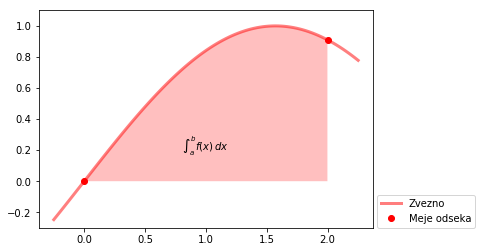

In [8]:
izberi = (x_d[0] <= x_d_polno) & (x_d_polno <= x_d[1])
# prikaz 
plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
plt.plot(x_d, y_d, 'ro', label='Meje odseka')
plt.annotate('$\int_a^b f(x)\,dx$', (.8, 0.2))
plt.ylim(-0.3, 1.1)
plt.legend(loc=(1.01, 0));

Definirajmo sedaj t.i. vozliščne točke in razdaljo med njimi:

In [9]:
print('Vozlišča:', x_d)
h_d = x_d[1] - x_d[0]
print('Razdalja:', h_d)

Vozlišča: [ 0.  2.]
Razdalja: 2.0


V nadaljevanju bomo poskušali za prikazani odsek čimbolj natančno izračunati površino. Pri tem se bomo v okviru *Newton-Cotesovega* pristopa omejili na ekvidistantno širino odsekov. Najbolj preprosta metoda je *pravokotna*.

## Pravokotno pravilo integriranja

Najbolj preprosta metoda za izračun integrala je *pravokotno pravilo*: na polovici intervala $x^*=(a+b)/2$ izračunamo vrednost funkcije $f(x^*)$ in nato množimo s širino intervala $h$:
$$I_{\textrm{pravokotno}}=h\cdot f\left(\frac{a+b}{2}\right)$$

Izračun vrednosti v vozliščih (za poljubno vozlišč):

In [10]:
x_pravo = (x_d+h_d/2)[:-1]
y_pravo = fun_d(x_pravo)

Prikaz

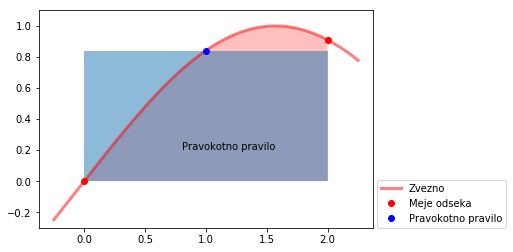

In [11]:
plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
plt.plot(x_d, y_d, 'ro', label='Meje odseka')
plt.plot(x_pravo, y_pravo, 'bo', label='Pravokotno pravilo')
plt.bar(x_pravo, y_pravo, width=h_d, alpha=0.5)
plt.annotate('Pravokotno pravilo', (.8, 0.2))
plt.ylim(-0.3, 1.1)
plt.legend(loc=(1.01, 0));

### Numerična implementacija

In [12]:
def pravokotno(y, h):
    return np.sum(y)*h

In [13]:
I_pravokotno = pravokotno(y_pravo, h_d)
I_pravokotno

In [14]:
I_analiticno

## Trapezno pravilo

Trapezno pravilo vrednosti na podintervalu interpolira z linearno funkcijo. Za dve vozliščni točki to pomeni, da povšino izračuno kot:

$$I_{\textrm{trapezno}}=\sum_{i=0}^{n=1}A_i\,f(x_i)=\frac{h}{2}\cdot\left(f(a)+f(b)\right).$$

To tudi pomeni, da so uteži:

$$A_0 = A_1 = \frac{1}{2}\,h.$$

Prikaz

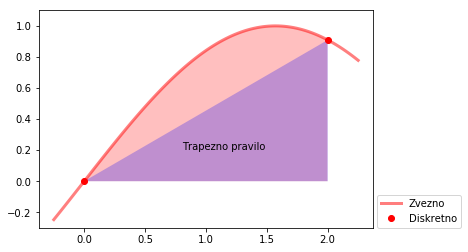

In [15]:
plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
plt.plot(x_d, y_d, 'ro', label='Diskretno')
plt.fill_between(x_d, y_d, alpha=0.25, facecolor='b')
plt.annotate('Trapezno pravilo', (.8, 0.2))
plt.ylim(-0.3, 1.1)
plt.legend(loc=(1.01, 0));

### Numerična implementacija

In [16]:
def trapezno(y, h):
    return (y[0] + y[-1])*h/2

In [17]:
I_trapezno = trapezno(y_d, h_d)
I_trapezno

In [18]:
I_analiticno

### Napaka trapeznega pravila

Napaka trapeznega pravila (in tudi drugih) je definirana kot:

$$E = \int_a^bf(x)\,d x-I,$$

kjer je $I$ ocena integrala. V kolikor ima funkcija $f(x)$ odvod drugega in višjih redov enak nič, potem je ocena integrala točna vrednosti in napake ni.

V kolikor ima funkcija $f(x)$ tudi drugi in višje odvode, potem se lahko (glejte npr. vir: Burden, Faires, Burden: Numerical Analysis 10th Ed) izpelje ocena napake:

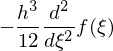

In [19]:
E_trapezno = - h**3 / 12 * f(xi).diff(xi, 2)
E_trapezno

kjer je $\xi$ neznana vrednost na intervalu $[a, b]$.

Kako zgornjo oceno napake izkoristimo v svoj prid, si bomo pogledali pozneje.

## Sestavljeno trapezno pravilo

Če trapezno pravilo uporabimo čez $n$ odsekov, potem govorimo o sestavljenem trapeznem pravilu (ang. *composite trapezoidal rule*). V tem primeru za vsak odsek $i$ uporabimo trapezno pravilo in torej za meje odseka $x_i$ in $x_{i+1}$ uporabiti uteži $A_i=A_{i+i}=h/2$. Ker so notranja vozlišča podvojena, sledi:
$$A_0=A_{n}=\frac{h}{2}\quad\textrm{in za ostale vozle:}\quad A_i=h.$$
Sledi torej:
$$I_{\textrm{trapezno sest}}=\sum_{i=0}^{n}A_i\,f(x_i)=\left(\frac{y_0}{2} + y_1+y_2+\cdots+y_{n-1}+\frac{y_{n}}{2}\right)\,h.$$


Poglejmo si primer

In [20]:
n.subs(podatki)

In [21]:
x_d_sestav = np.linspace(x_d[0], x_d[1], n.subs(podatki)+1) # več intervalov
y_d_sestav = fun_d(x_d_sestav)
izberi = (x_d[0] <= x_d_polno) & (x_d_polno <= x_d[1])
# prikaz
def slika():
    plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
    plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
    plt.plot(x_d_sestav, y_d_sestav, 'ro', label='Meje odseka')
    plt.fill_between(x_d_sestav, y_d_sestav, alpha=0.25, facecolor='b')
    plt.annotate('Sestavljeno trapezno pravilo: $n$={}'.format(n.subs(podatki)), (.4, 0.2))
    plt.ylim(-0.3, 1.1)
    plt.legend(loc=(1.01, 0))
    plt.show()

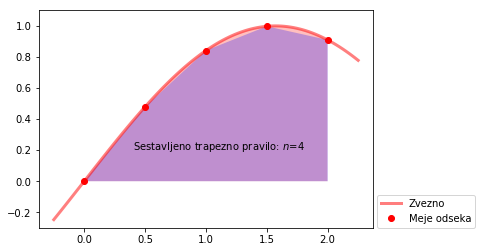

In [22]:
slika()

Prikazali smo torej $n$ odsekov z vozlišči in vrednostmi:

In [23]:
print('Vozlišča:  ', x_d_sestav)
print('Vrednosti: ', y_d_sestav)

Vozlišča:   [ 0.   0.5  1.   1.5  2. ]
Vrednosti:  [ 0.          0.47942554  0.84147098  0.99749499  0.90929743]


### Numerična implementacija

In [24]:
def trapezno(y, h):
    return (np.sum(y) - 0.5*y[0] - 0.5*y[-1])*h

In [25]:
#%%timeit
h_d = x_d_sestav[1] - x_d_sestav[0]
I_trapezno_sestav = trapezno(y_d_sestav, h_d)
I_trapezno_sestav

In [26]:
I_analiticno

### ``numpy`` implementacija

Implementacija ``numpy`` omogoča sicer tudi spremenljiv razmak med vozlišči. Primer zgoraj izračunamo zelo enostavno:

In [27]:
#%%timeit
trapz_h = np.trapz(y_d_sestav, dx=h_d)
trapz_h

Poglejmo si še oceno integrala pri $2\,h$:

In [28]:
trapz_2h = np.trapz(y_d_sestav[::2], dx=2*h_d)
trapz_2h

### Napaka sestavljenega trapeznega pravila

Ocena napake (vir: Jaan Kiusalaas: Numerical Methods in Engineering With Python 3, 3rd Ed) za sestavljeno trapezno pravilo je vsota napak na posameznih odsekih:

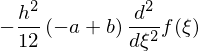

In [29]:
E_trapezno_sestav = (n * E_trapezno).subs(h*n, b-a)
E_trapezno_sestav

kjer je $\xi$ neznana vrednost na intervalu $[a, b]$.

V kolikor integral $I$ ocenjujemo pri dveh različnih korakih $h$ in $2\,h$:
$$I_h + E_h = I_{2h} + E_{2h},$$
kjer je $I_h$ približek integrala s korakom $h$ in $E_h$ ocena napake pri koraku $h$; analogno velja za $I_{2h}$ in $E_{2h}$.

Če predpostavimo, da je $\frac{d^2}{d \xi^2}  f\left (\xi \right )$ v obeh primerih enak, lahko izpeljemo $A = I_{2h}-I_{h} = E_{h}-E_{2h}$:

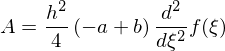

In [30]:
sym.Eq(A, E_trapezno_sestav - E_trapezno_sestav.subs(h, 2*h))

In posledično najdemo izraz za $\frac{d^2}{d \xi^2}  f\left (\xi \right )$:

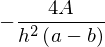

In [31]:
f2 = sym.solve(
    sym.Eq(A, E_trapezno_sestav - E_trapezno_sestav.subs(h, 2*h))
    , f(xi).diff(xi, 2)
)[0]
f2

Izpeljani izraz vstavimo v izraz za oceno napake in izeljemo:

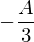

In [32]:
E_trapezno_sestav.subs(f(xi).diff(xi, 2), f2).simplify()

Izpeljali smo torej, da iz numeričnega integrala (približka) $I_{2h}$ s korakom $2h$ in integrala  $I_{h}$ s korakom $h$ lahko torej določimo boljši približek  $I_{h}^*$:
$$I_h^* = I_h - \frac{1}{3}\,(I_{2h}-I_h)$$
ali
$$I_h^* = \frac{4}{3}\,I_h - \frac{1}{3}\,I_{2h}$$

In [33]:
trapz_h

In [34]:
4/3*trapz_h - 1/3*trapz_2h

In [35]:
I_analiticno

## Simpsonova in druge metode

Zgoraj smo si pogledal trapezno pravilo, ki temelji na linearni interpolaciji odseka. Z interpolacijo višjega reda, lahko izpeljemo še druge interpolacijske metode.

Izpeljavo začnemo z analitičnim izrazom za integriranje $f(x)$:
$$\int_{a}^b f(x)\,dx.$$
Sedaj $f(x)$ interpoliramo z Lagrangevo krivuljo $P_n(x)$ stopnje $n$:
$$P_n(x)=\sum_{i=0}^{n}\,f(x_i)\,l_i(x),$$
kjer $n$ definira stopnjo Lagrangevega polinoma:
$$l_i(x)=\prod_{j=0, j\ne i}^n \frac{x-x_j}{x_i-x_j}.$$

Za oceno numeričnega integrala, torej namesto funkcije $f(x)$ vstavimo v integral interpolacijski polinom $P_n(x)$:
$$I=\int_{x_0}^{x_{n-1}} P_n(x)\,dx=\int_{x_0}^{x_{n-1}} \sum_{i=0}^{n}\,f(x_i)\,l_i(x)\,dx.$$
Sedaj lahko zamenjamo integriranje in vsoto:
$$I=\sum_{i=0}^{n}\,f(x_i)\,\underbrace{\int_{x_0}^{x_{n-1}} l_i(x)\,dx}_{A_i}.$$
Opazimo, da lahko Lagrangev polinom integriramo *v naprej* in da v bistvu predstavlja (zgoraj definirane) uteži $A_i$.

Za poznejše potrebe si dajmo pripraviti definicijo Lagrangevega polinoma:

In [36]:
def lagrange(n, x, X='x'):
    if isinstance(X, str):
        X = sym.symbols('{0:s}:{1:g}'.format(X, n))
    coeffs = []
    for i in range(0, n):
        numer = []
        denom = []

        for j in range(0, n):
            if i == j:
                continue

            numer.append(x    - X[j])
            denom.append(X[i] - X[j])
        
        numer = sym.Mul(*numer)
        denom = sym.Mul(*denom)

        coeffs.append(numer/denom)
    return coeffs    

## Izpeljava trapeznega pravila z uporabo Lagrangevih polinomov

Najprej poglejmo Lagrangeva polinoma za linearno interpolacijo ($n=2$):

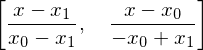

In [37]:
x, x0, x1, h = sym.symbols('x x0, x1, h')
lag = lagrange(2, x)
lag

Poglejmo si najprej prvi Lagrangev polinom in ga integrirajmo:

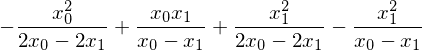

In [38]:
int0 = sym.integrate(lag[0], (x, x0, x1))
int0

Izvedemo sedaj razcep polinoma:

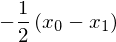

In [39]:
int1 = int0.factor()
int1

Ker je širina odseka konstantna $h$, izvedemo zamenjavo:

In [40]:
zamenjave = {x1: x0+h}
int1.subs(zamenjave)

Podobno bi sedaj lahko naredili še za drugi Lagrangev polinov, vendar si bomo raje v nadaljevanju pogledali strnjeno obliko postopka za oba polinoma.

## Strnjen izračun uteži za trapezno metodo

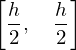

In [41]:
x, x0, x1, h = sym.symbols('x, x0, x1, h')
zamenjave = {x1: x0+h}
A_trapez = [sym.integrate(_, (x, x0, x1)).factor().subs(zamenjave) 
            for _ in lagrange(2, x)]
A_trapez

## Strnjen izračun uteži za Simpsonovo 1/3 pravilo

Potem, ko smo zgoraj pokazali strnjen izračun za trapezno pravilo lahko podobno izvedemo za kvadratno interpolacijo čez tri točke ($n=3$).

Izračun uteži je skoraj analogen zgornjemu in skoraj trivialen:

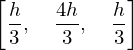

In [42]:
x, x0, x1, x2, h = sym.symbols('x, x0, x1, x2, h')
zamenjave = {x1: x0+h, x2: x0+2*h}
A_Simpson1_3 = [sym.integrate(_, (x, x0, x2)).factor().subs(zamenjave).factor() 
             for _ in lagrange(3, x)]
A_Simpson1_3

## Strnjen izračun uteži za Simpsonovo 3/8 pravilo

Nadaljujemo lahko s kubično interpolacijo čez štiri točke ($n=4$):

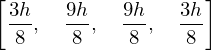

In [43]:
x, x0, x1, x2, x3, h = sym.symbols('x, x0, x1, x2, x3, h')
zamenjave = {x1: x0+h, x2: x0+2*h, x3: x0+3*h}
A_Simpson3_8 = [sym.integrate(_, (x, x0, x3)).factor().subs(zamenjave).factor() 
                for _ in lagrange(4, x)]
A_Simpson3_8

Ime te metode prihaja iz uteži prvega člena (3/8). 

## Strnjen izračun za interpolacijski polinom 4 stopnje

Nadaljujemo lahko z interpolacijskim polinomom 4. stopnje (čez pet točk, $n=5$):

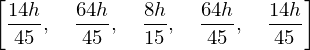

In [44]:
x, x0, x1, x2, x3, x4, h = sym.symbols('x, x0, x1, x2, x3, x4, h')
zamenjave = {x1: x0+h, x2: x0+2*h, x3: x0+3*h, x4: x0+4*h}
A_Pretiravanje = [sym.integrate(_, (x, x0, x4)).factor().subs(zamenjave).factor() 
                for _ in lagrange(5, x)]
A_Pretiravanje

Z izpeljavami polinomov višjih redov bomo tukaj zaključili.

## Prikaz uporabe Simpsonove 1/3 metode

In [45]:
from scipy import interpolate

In [46]:
x_d_Simpson1_3 = np.linspace(x_d[0], x_d[1], n.subs(podatki)+1) # več intervalov
y_d_Simpson1_3 = fun_d(x_d_Simpson1_3)
y_interpolate = interpolate.lagrange(x_d_Simpson1_3, y_d_Simpson1_3)

izberi = (x_d[0] <= x_d_polno) & (x_d_polno <= x_d[1])
# prikaz
def slika():
    plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
    plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
    plt.plot(x_d_Simpson1_3, y_d_Simpson1_3, 'ro', label='Meje odseka')
    plt.plot(x_d_polno, y_interpolate(x_d_polno), 'b', label='Interpolacija')
    plt.fill_between(x_d_polno[izberi], y_interpolate(x_d_polno[izberi]), 
                     alpha=0.25, facecolor='b')
    plt.annotate('Simpsonovo 1/3 pravilo: $n$={}'.format(n.subs(podatki)), (.4, 0.2))
    plt.ylim(-0.3, 1.1)
    plt.legend(loc=(1.01, 0));
    plt.show()

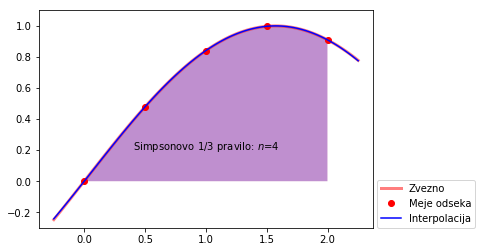

In [47]:
slika()

### Numerična implementacija sestavljenega Simpsonovega 1/3 pravila

Spomnimo se uteži za Simpsonovo 1/3 pravilo:

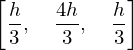

In [48]:
A_Simpson1_3

V kolikor želimo to uporabiti na ne več kot treh točkah, lahko to naredimo na podoben način kakor smo pri trapeznem pravilo, vendar moramo tukaj malenkost bolj paziti. Potrebujemo najmanj tri točke, število točk pa mora biti liho saj interpoliramo čez tri točke. Ker je med odseki ena točka skupna imajo te točke v bistvu dvojno utež. Numerična implementacija je tukaj:

In [49]:
def simpson1_3(y, h=1., izpis=True):
    utezi = np.array([1., 4., 1.])/3*h
    if len(y)%2 == 0:
        raise Exception('Ne morem uporabiti Simpsonovega 1/3 pravila.\
        Pričakovano liho število vrednosti.')
    utezi_arr = np.zeros_like(y)
    for i in range(len(y)//2):
        utezi_arr[2*i:2*i+3] = utezi_arr[2*i:2*i+3] + utezi
    if izpis:
        print(utezi_arr)
    return utezi_arr.dot(y)

Primer uporabe:

In [50]:
#%%timeit
h_d = x_d_Simpson1_3[1]-x_d_Simpson1_3[0]
I_Simpson1_3 = simpson1_3(y_d_Simpson1_3, h_d, izpis=False)
I_Simpson1_3

In [51]:
I_Simpson1_3_2h = simpson1_3(y_d_Simpson1_3[::2], 2*h_d, izpis=False)
I_Simpson1_3_2h

In [52]:
I_analiticno

In [53]:
I_trapezno_sestav

### ``scipy`` implementacija

In [54]:
from scipy import integrate

In [55]:
#%%timeit
integrate.simps(y_d_sestav, dx=h_d)

Sicer lahko uteži različnih *Newton-Cotesovih* pristopov pridobimo takole:

In [56]:
integrate.newton_cotes(3)

(array([ 0.375,  1.125,  1.125,  0.375]), -0.0375)

Če nas pa na vsakem odseku zanima rezultat, pa lahko uporabimo funkcijo ``integrate.cumtrapz``:

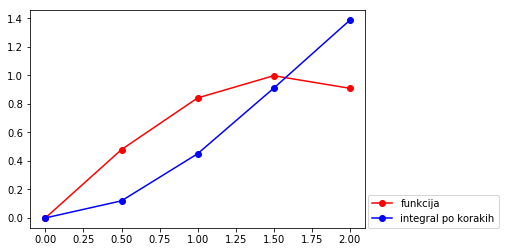

In [57]:
I_po_korakih = integrate.cumtrapz(y_d_sestav, dx=h_d, initial=0)
plt.plot(x_d_sestav, y_d_sestav, 'ro-', label='funkcija')
plt.plot(x_d_sestav, I_po_korakih, 'bo-', label='integral po korakih');
plt.legend(loc=(1.01, 0));

### Napaka sestavljene Simpsonove 1/3 metode

Ocena napake (vir: Jaan Kiusalaas: Numerical Methods in Engineering With Python 3, 3rd Ed) za sestavljeno Simpsonov 1/3 pravilo je:

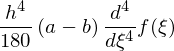

In [58]:
E_simpsonovo_sestav = - (b - a) * h**4 / 180 * f(xi).diff(xi, 4)
E_simpsonovo_sestav

kjer je $\xi$ neznana vrednost na intervalu $[a, b]$.

Podobno kakor pri trapeznem pravilu, lahko pri dveh različnih korakih ($h$ in $2h$) ocenimo $\frac{d^4}{d \xi^4}  f\left (\xi \right )$:

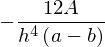

In [59]:
f4 = sym.solve(
    sym.Eq(A, E_simpsonovo_sestav - E_simpsonovo_sestav.subs(h, 2*h))
    , f(xi).diff(xi, 4)
)[0]
f4

Kjer je $A = I_{2h}-I_h$. Izpeljani izraz vstavimo v izraz za oceno napake in izeljemo:

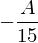

In [60]:
E_simpsonovo_sestav.subs(f(xi).diff(xi, 4), f4).simplify()

Končno lahko torej določimo ob pomoči približka z korakom $h$ in $2h$ določili boljši približek:
$$I_h^* = \frac{16}{15}\,I_h - \frac{1}{15}\,I_{2h}.$$

In [61]:
16/15*I_Simpson1_3-1/15*I_Simpson1_3_2h

In [62]:
I_analiticno

In [63]:
I_Simpson1_3

# Gaussov integracijski pristop - Gaussova kvadratura

Pristop k integriranju zgoraj je temeljil na konstantnem koraku in izbrano pravilo (pravokotno, trapezno, Simpsonovo,...) rezultira v točen rezultat v kolikor je integrirana funkcija $f(x)$ polinom enake ali nižje stopnje kakor je uporabljena interpolacija posameznega Newton-Cotesovega pristopa (npr. trapezno pravilo izračuna točno linearne funkcije).

Ideja *Gaussove integracije / kvadrature* je v principu drugačna. Da jo spoznamo, si poglejmo spodnjo sliko:

In [64]:
#poljubno izbrane točke na intervalu [a, b]
x_izbrane = np.asarray([0.4, 1.5])
y_izbrane = fun_d(x_izbrane)
lin_inter = interpolate.lagrange(x_izbrane, y_izbrane)
#
def slika():
    plt.fill_between(x_d_polno[izberi], y_d_polno[izberi], alpha=0.25, facecolor='r')
    plt.plot(x_d_polno, y_d_polno, 'r', lw=3, alpha=0.5, label='Zvezno')
    plt.plot(x_d, y_d, 'ro', label='Diskretno')
    plt.fill_between(x_d, y_d, alpha=0.25, facecolor='b')
    plt.plot(x_izbrane, y_izbrane, 'go', label='Poljubno izbrane')
    plt.fill_between(x_d, lin_inter(x_d), alpha=0.25, facecolor='g')
    plt.annotate('Trapezno pravilo', (.8, 0.2))
    plt.annotate('Poljubno izbrana vozlišča', (.8, 0.90), rotation=30)
    plt.ylim(-0.3, 1.3)
    plt.legend(loc=(1.01, 0));
    plt.show()

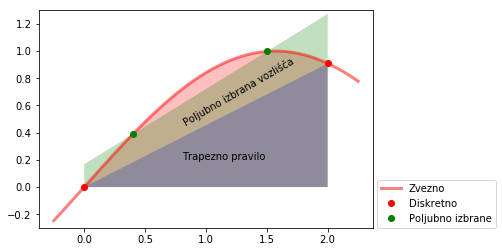

In [65]:
slika()

Iz slike opazimo, da bi lahko z drugačno izbiro vozlišč tudi s trapeznim pravilom bolje aproksimirali integral. In ravno v tem je ideja Gaussovega pristopa k aproksimaciji integrala; cilj je integral funkcije $f(x)$ nadomestiti z uteženo vsoto vrednosti funkcije pri diskretnih vrednostih $f(x_i)$:
$$\int_a^bf(x)\,dx\approx \sum_i^{n-1} w_i\, f(x_i).$$
Pri tem je neznana utež $w_i$ in tudi lega vozlišča $x_i$. Z večanjem števila uteži $n$ bomo pa lahko povečali tudi stopnjo interpolacijskega polinoma.

V nadaljevanju si bomo torej pogledali Gaussovo kvadraturo in spoznali, da lahko zelo učinkovito izračunamo točen integral. Prednost Gaussove kvadrature je tudi, da lahko izračuna integral funkcij s singularnostmi (npr: $\int_0^1\sin(x)/\sqrt{(x)}\,dx$)

## Gaussova kvadratura z enim vozliščem

Predpostavimo, da želimo integrirati polinom stopnje $n=1$ (linearna funkcija):
$$f(x)=P_1(x)=A_0+A_1\,x.$$
Točen rezultat integrala $\int_a^bP_1(x)\,\textrm{d}x$ je:

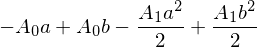

In [66]:
A0, A1, x, a, b, w0, x0 = sym.symbols('A0, A1, x, a, b, w0, x0')
P1 = A0 + A1*x
P1.integrate((x, a, b))

Če bi želeli integral izračunati glede na vrednosto funkcije $f$ v neznanem vozlišču $x_0$:
$$\int_a^bP_1(x)dx = w_0\,P_1(x_0),$$
potem moramo najti tudi ustrezno utež $w_0$. 
Zapišimo enačbo simbolno:

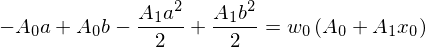

In [67]:
sym.Eq(P1.integrate((x, a, b)).expand(), w0*P1.subs(x, x0))

Spomnimo, da so $a$ in $b$ znane meje, $A_i$ konstante poljubne linearne funkcije, $w_0$ in $x_0$ pa neznani vrednosti. Ker sta $A_i$ poljubni, lahko iz zgornjega izraza izpeljemo dve enačbi (najprej je samo $A_0\neq0$, potem pa samo $A_1\neq0$):

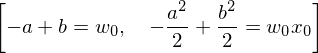

In [68]:
eqs = [sym.Eq(P1.integrate((x, a, b)).expand().coeff(A_),\
              w0*P1.subs(x, x0).coeff(A_))\
       for A_ in [A0, A1]]
eqs

Izpeljali smo dve enačbi in dve neznanki, sistem lahko rešimo:

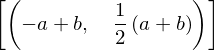

In [69]:
sym.solve(eqs, [w0, x0])

Zaradi lažje splošne uporabe, pri Gaussovi kvadraturi tipično uporabljamo meje $a=-1$ in $b=1$.

Poljubne meje $x\in[a,b]$ lahko vedno transformiramo v meje $\xi\in[-1, +1]$ s pomočjo:
$$x=\frac{b+a}{2}+\frac{b-a}{2}\xi$$
posledično je Gaussova kvadratura potem:
$$\int_a^bf(x)\,dx\approx\frac{b-a}{2}\sum_i A_i\,f(x_i).$$

V primeru standardiziranih mej, je utež $w_0=2$ in $x_0=0$ vrednost pri kateri moramo izračunati funkcijo $f$. Če je integrirana funkcija linearna, bomo torej samo na podlagi vrednosti v eni točki izračunali pravo vrednost!

Če vam je bila razlaga tukaj prehitra ali premalo jasna, vam priporočam ogled tega video posnetka:
https://www.youtube.com/watch?v=iQ5-4hx25Rw

## Gaussova kvadratura z več vozlišči

Tukaj želimo zgornji pristop posplošiti na $n$ vozlišč:
$$\int_a^bP_{2n-1}(x)dx = \sum_i^n w_i\,P_{2n-1}(x_i),$$
kakor zgornja enačba nakazuje, je treba za Gaussovo kvadraturo z $n$ vozlišči uporabiti polinom stopnje $2n-1$:
$$f(x)=P_{2n-1}(x)=\sum_{i=0}^{2n-1} A_i\,x^i.$$
To je v bistvu zelo dobro, saj z dvema Gaussovima vozliščema točno izračunamo integral polinoma do 3 reda, s tremi Gausovimi vozlišči pa točno izračunamo integral polinoma do 5 reda!

Pripravimo si najprej simbolni zapis polinoma in ustreznih spremenljivk:

In [70]:
def P_etc(n=1, A='A', X='X'):
    A = sym.symbols('{0:s}:{1:g}'.format(A, n))
    X = sym.symbols(X)
    return A, X, sum([A[i]*X**i for i in range(n)])

In [71]:
stevilo_tock = 2
A, X, P = P_etc(n=2*stevilo_tock)
x = sym.symbols('x:{0:g}'.format(stevilo_tock))
w = sym.symbols('w:{0:g}'.format(stevilo_tock))

In [72]:
P

Definirajmo enačbe:

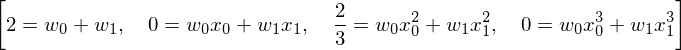

In [73]:
eqs = [sym.Eq(P.integrate((X, -1, 1)).coeff(A_),\
              sum([w[i]*P.subs(X, x[i]) \
                   for i in range(stevilo_tock)]).expand().coeff(A_)) \
       for A_ in A]
eqs

In jih rešimo

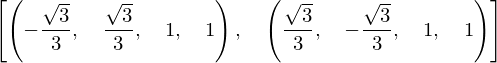

In [74]:
sol = sym.solve(eqs, sym.flatten((x, w)))
sol

Reševanje zgornjega problema je nelinearno zato dobimo več rešitev in simbolno ima smisel reševati do treh vozlišč.

| Število točk | Vozlišče  $x_i$ | Utež $w_i$ |
|:------------:|:------------:|:------------:|
||||
|1 | 0 | 2 |
||||
|2 | $-\frac{\sqrt{3}}{3}$ | 1 |
| | $+\frac{\sqrt{3}}{3}$ | 1 |
||||
| | $-\frac{\sqrt{15}}{5}$ | $\frac{5}{9}$ |
|3 | $0$ | $\frac{8}{9}$ |
| | $\frac{\sqrt{15}}{5}$ | $\frac{5}{9}$ |


Vsebino bi tukaj lahko nadaljevali s pregledom različnih pravokotnih (tukaj se ne bomo spustili podrobneje v pomen termina *pravokotnih polinomov*) polinomov (npr. *Legendre*, *Chebyshev*, *Leguerre*, *Hermite*). 

Naprej bi lahko nadaljevali v smeri Gaussove integracije v več dimenzijah, ki se pogosto uporablja npr. pri končnih elementih.

Ker pa bi s tem bistveno presegli namen tega predmeta in ker je za osnovno uporabo v praksi zavedanje predhodno navedene teorije dovolj, se s teorijo numeričnega integriranja tukaj ustavimo.

## Uporaba ``scipy.integrate`` modula

Uporaba vgrajenih funkcij je zelo enostavna; tudi meje so samodejno transformirane.

In [75]:
I_analiticno

In [76]:
integrate.quadrature(fun_d, 0, 2, maxiter=2)

C:\Users\Janko\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:199: AccuracyWarning: maxiter (2) exceeded. Latest difference = 2.727850e-01
  AccuracyWarning)


In [77]:
#%%timeit
integrate.quadrature(fun_d, 0, 2)

In [78]:
#%%timeit
integrate.quad(fun_d, 0, 2)

# Nekaj vprašanj za razmislek!

1. Na sliki (vir: J. Slavič: Dinamika, meh. nihanja..., 2014) je prikazan trikotnik s stranicami dolžine $a$, $b$, debelino $h$ in gostoto $\rho$.
<img src="./fig/Slavic_2014_str_242_slika_5.4.png" width=200>
V simbolni obliki določite masni vztrajnostni moment glede na prikazano os $y$:
$$J_{yy}=\int_0^b y^2\,\rho\,h\,(a-a/b\,y)\,dy.$$
Upoštevajte tudi: $m=a\,b\,h\,\rho/2$. Za izmišljene vrednosti izračunajte numerični rezultat.
* Izračunajte integral tudi numerično. Uporabite ``scipy.integrate`` in integrirajte glede na pravila: trapezno, Simpsonovo 1/3. Rezultat primerjajte tudi z Gaussovo kvadraturo.
Raziščite natančnost in hitrost metod.
* Preštudirajte ``scipy.special.legendre``, ki vam vrne objekt ``orthopoly1d``. Ta objekt ima metodo ``weights``, ki vrne seznam ``[x, w, mu0]`` vrednosti, ki jih uporabimo pri Gaussovi kvadraturi. (Če tukaj vsega ne razumete, ne skrbite preveč, bo asistent pokazal/komentiral). Opazite lahko, da smo vrednosti izpeljali na predavanjih!
* S pomočjo zgoraj pridobljenih uteži in vozlišč izračunajte integral s pomočjo Gaussove kvadrature: $\sum_iw_i\,f(x_i)$. Pazite na transformacijo mej:
$$x=\frac{b+a}{2}+\frac{b-a}{2}\xi$$
$$\int_a^bf(x)\,dx\approx\frac{b-a}{2}\sum_i A_i\,f(x_i).$$
* Preprosti integral $\int_0^2x^2\,dx$ izrabite za prikaz trapeznega in Simpsonovega 1/3 pravila (osnovno pravilo, ne sestavljeno). Uteži izračunajte z uporabo ``scipy``.
* Integral predhodne točke razširite za sestavljeno trapezno pravilo (lastna koda). Prikažite vpliv števila odsekov, primerjte napako izračuna s predhodnim številom odsekov in prikažite konvergenco.
* Integral predhodne točke razširite za sestavljeno Simpsonovo 1/3 pravilo (lastna koda). Prikažite vpliv števila odsekov, primerjte napako izračuna s predhodnim številom odsekov in prikažite konvergenco.
* Z različnimi metodami izračunajte integrala:
$$\int_1^2\frac{\sin(x)}{\sqrt{x}}$$
in
$$\int_0^1\frac{\sin(x)}{\sqrt{x}}.$$
* S pomočjo numeričnega integriranja določite ekvivalentno silo porazdeljene obremenitve ($Q$) ter njeno prijemališče vzdolž nosilca ($x_Q$) dolžine $L = 2\,$m. Konstanta obremenitve: $q_0 = 5\,$kN/m.
<img src="./fig/nal-num_integriranje_1-1.jpg" width=350>
Rešitev: 
ekvivalentna obremenitev $Q = \int_0^L{q(x) \mathrm{d}x}$, pozicija (težišče) $x_Q = \frac{ \int_0^L{x\,q(x) \mathrm{d}x} }{ \int_0^L{q(x) \mathrm{d}x} }$

Delno rešene vaje se nahajajo [tukaj](./vaje/Vaja 11 - polovica.ipynb).

# Ekstra

1. Obravnavajte prikazani enoosni primer, obremenjen z porazdeljeno obremenitvijo $n(x)$ ter točkovno silo $F=10\,$kN. Dolžina palice je $L = 2\,$m, konstanta $n_0 = 15\,$kN/m in $EA = 200000\,\mathrm{MPa} \times 50×50\, \mathrm{mm^2}$.
<img src="./fig/nal-num_integriranje_2-2.jpg" width=350>
Naloga: 
    1. S pomočjo simbolnega integriranja določite funkcijo notranje osne sile $N(x)$.
    * S pomočjo numeričnega integriranja izračunajte pomik prostega konca palice $u_0$.